# Load and visualize data

In [1]:
import util
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import core
import numpy as np
from importlib import reload
import pdb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random

DPI = 120
IMG_PATH_PREFIX = 'writeup/images/'

def save_fig(fig, file_prefix):
  fig.tight_layout()
  fig.savefig(f"{IMG_PATH_PREFIX}{file_prefix}.png", format='png', dpi=DPI, bbox_inches='tight')

params = {
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
          }
pylab.rcParams.update(params)

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# For each rho I generate using 100 different initial conditions.
num_sample = 100
def get_data_path(rho, sample):
  # Note sample goes from 1 to num_sample
  return f"data/lorenz_rho_{rho}_iter_{sample}.mat"

# Rho's. Train = [10,28,40]. Test = [17, 35]
# 10 is the only one that just decays. The rest shows stable oscillations.
ts, ys = util.load_lorenz_data(get_data_path(28, 1))

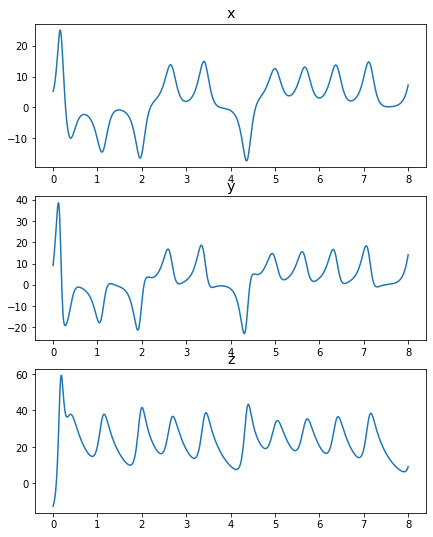

In [2]:
fig = util.plot_lorenz_2ds(ts, ys)

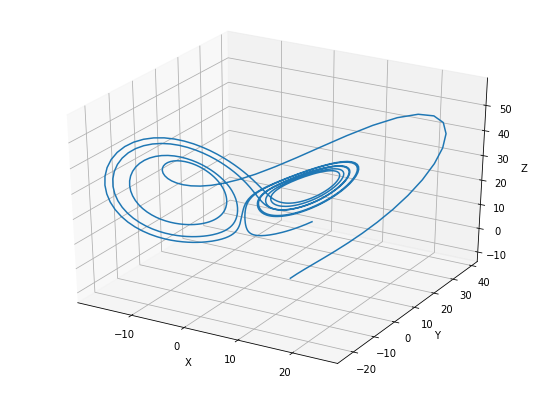

In [8]:
fig = util.plot_lorenz_3d(ts, ys)

# Get training and test data

In [9]:
# The regression problem is: Given w(t) = (x(t),y(t),z(t)), predict w(t+dt)
# The training matrix is the result of combining rho=[10,28,40] datasets
train_rhos = [10,28,40]

train_inputs = []
train_outputs = []
for rho in train_rhos:
  for sample in range(1,num_sample+1):
    ts, ys = util.load_lorenz_data(get_data_path(rho, sample))
    train_input, train_output = core.lorenz_mat_to_regression(ys.T, rho)
    train_inputs.append(train_input)
    train_outputs.append(train_output)
train_input = np.vstack(train_inputs)
train_output = np.vstack(train_outputs)

# Cross validate

In [28]:
def build_model(N):
  model = tf.keras.Sequential()
  # 4 inputs for x,y,z,rho
  model.add(layers.Dense(N, activation='sigmoid', input_shape=(4,)))
  model.add(layers.Dense(N, activation='sigmoid'))
  model.add(layers.Dense(N, activation='sigmoid'))
  model.add(layers.Dense(N, activation='sigmoid'))
  
  # Output = x,y,z of the next timestep
  model.add(layers.Dense(3))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss='mse',
                metrics=['mse'])
  return model

Ns = [5, 10, 25, 50, 100]
mses = []
for N in Ns:
  model = build_model(N)
  mse = core.get_kfold_mse(model, train_input, train_output)
  mses.append(mse)
for i in range(len(Ns)):
  print(f"N= {Ns[i]}, kfold mse = {mses[i]}")

'\nNs = [5, 10, 25, 50, 100]\nmses = []\nfor N in Ns:\n  model = build_model(N)\n  mse = core.get_kfold_mse(model, train_input, train_output)\n  mses.append(mse)\nfor i in range(len(Ns)):\n  print(f"N= {Ns[i]}, kfold mse = {mses[i]}")\n'

# Train on the entire train set with cross-validated parameter

In [35]:
best_N = 10
best_model = build_model(best_N)
history = best_model.fit(train_input, train_output, epochs=1000, batch_size=1000, shuffle=True)


Train on 240000 samples
Epoch 1/1000
240000/240000 [==============================] - 1s 5us/sample - loss: 265.5164 - mse: 265.5163
Epoch 2/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 228.4751 - mse: 228.4751
Epoch 3/1000
240000/240000 [==============================] - 1s 3us/sample - loss: 199.5313 - mse: 199.5314
Epoch 4/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 178.5267 - mse: 178.5267
Epoch 5/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 162.2200 - mse: 162.2200
Epoch 6/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 149.2361 - mse: 149.2360
Epoch 7/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 136.1790 - mse: 136.1789
Epoch 8/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 127.1136 - mse: 127.1136
Epoch 9/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 121.5773 - mse: 121.

240000/240000 [==============================] - 1s 4us/sample - loss: 0.2016 - mse: 0.2016
Epoch 153/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.1978 - mse: 0.1978
Epoch 154/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.1944 - mse: 0.1944
Epoch 155/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.1940 - mse: 0.1940
Epoch 156/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.1871 - mse: 0.1871
Epoch 157/1000
240000/240000 [==============================] - 6s 27us/sample - loss: 0.1903 - mse: 0.1903
Epoch 158/1000
240000/240000 [==============================] - 1s 3us/sample - loss: 0.1807 - mse: 0.1807
Epoch 159/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.1784 - mse: 0.1784
Epoch 160/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.1748 - mse: 0.1748
Epoch 161/1000
240000/240000 [=====================

240000/240000 [==============================] - 1s 3us/sample - loss: 0.0485 - mse: 0.0485
Epoch 303/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0502 - mse: 0.0502
Epoch 304/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0497 - mse: 0.0497
Epoch 305/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0518 - mse: 0.0518
Epoch 306/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0508 - mse: 0.0508
Epoch 307/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0473 - mse: 0.0473
Epoch 308/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0495 - mse: 0.0495
Epoch 309/1000
240000/240000 [==============================] - 1s 5us/sample - loss: 0.0474 - mse: 0.0474
Epoch 310/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0505 - mse: 0.0505
Epoch 311/1000
240000/240000 [======================

Epoch 378/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0343 - mse: 0.0343
Epoch 379/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0362 - mse: 0.0362
Epoch 380/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0339 - mse: 0.0339
Epoch 381/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0353 - mse: 0.0353
Epoch 382/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0345 - mse: 0.0345
Epoch 383/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0367 - mse: 0.0367
Epoch 384/1000
240000/240000 [==============================] - 1s 3us/sample - loss: 0.0346 - mse: 0.0346
Epoch 385/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0339 - mse: 0.0339
Epoch 386/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0325 - mse: 0.0325
Epoch 387/1000
240000/240000 [=======

240000/240000 [==============================] - 1s 4us/sample - loss: 0.0236 - mse: 0.0236
Epoch 528/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0204 - mse: 0.0204
Epoch 529/1000
240000/240000 [==============================] - 1s 3us/sample - loss: 0.0225 - mse: 0.0225
Epoch 530/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0240 - mse: 0.0240
Epoch 531/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0211 - mse: 0.0211
Epoch 532/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0225 - mse: 0.0225
Epoch 533/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0221 - mse: 0.0221
Epoch 534/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0215 - mse: 0.0215
Epoch 535/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0222 - mse: 0.0222
Epoch 536/1000
240000/240000 [======================

240000/240000 [==============================] - 1s 3us/sample - loss: 0.0174 - mse: 0.0174
Epoch 678/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0162 - mse: 0.0162
Epoch 679/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0203 - mse: 0.0203
Epoch 680/1000
240000/240000 [==============================] - 1s 3us/sample - loss: 0.0138 - mse: 0.0138
Epoch 681/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0166 - mse: 0.0166
Epoch 682/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0161 - mse: 0.0161
Epoch 683/1000
240000/240000 [==============================] - 1s 6us/sample - loss: 0.0173 - mse: 0.0173
Epoch 684/1000
240000/240000 [==============================] - 7s 28us/sample - loss: 0.0169 - mse: 0.0169
Epoch 685/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0167 - mse: 0.0167
Epoch 686/1000
240000/240000 [=====================

240000/240000 [==============================] - 7s 31us/sample - loss: 0.0137 - mse: 0.01373s - loss: 0.0136 -  - ETA: 2s - - ETA: 1s - loss: 0.0
Epoch 827/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0138 - mse: 0.0138
Epoch 828/1000
240000/240000 [==============================] - 1s 3us/sample - loss: 0.0137 - mse: 0.0137
Epoch 829/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0160 - mse: 0.0160
Epoch 830/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0118 - mse: 0.0118
Epoch 831/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0134 - mse: 0.0134
Epoch 832/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0142 - mse: 0.0142
Epoch 833/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0136 - mse: 0.0136
Epoch 834/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0139 - mse: 0.01

Epoch 900/1000
240000/240000 [==============================] - 8s 32us/sample - loss: 0.0133 - mse: 0.0133
Epoch 901/1000
240000/240000 [==============================] - 1s 5us/sample - loss: 0.0126 - mse: 0.0126
Epoch 902/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0127 - mse: 0.0127
Epoch 903/1000
240000/240000 [==============================] - 1s 5us/sample - loss: 0.0131 - mse: 0.0131
Epoch 904/1000
240000/240000 [==============================] - 1s 5us/sample - loss: 0.0120 - mse: 0.0120
Epoch 905/1000
240000/240000 [==============================] - 1s 5us/sample - loss: 0.0129 - mse: 0.0129
Epoch 906/1000
240000/240000 [==============================] - 1s 6us/sample - loss: 0.0132 - mse: 0.0132
Epoch 907/1000
240000/240000 [==============================] - 1s 5us/sample - loss: 0.0119 - mse: 0.0119
Epoch 908/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0135 - mse: 0.0135
Epoch 909/1000
240000/240000 [======

240000/240000 [==============================] - 1s 3us/sample - loss: 0.0130 - mse: 0.0130
Epoch 975/1000
240000/240000 [==============================] - 1s 3us/sample - loss: 0.0119 - mse: 0.0119
Epoch 976/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0108 - mse: 0.0108
Epoch 977/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0128 - mse: 0.0128
Epoch 978/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0118 - mse: 0.0118
Epoch 979/1000
240000/240000 [==============================] - 4s 16us/sample - loss: 0.0119 - mse: 0.01190s - loss: 0.0119 - mse: 0.0
Epoch 980/1000
240000/240000 [==============================] - 4s 18us/sample - loss: 0.0124 - mse: 0.01249s - l
Epoch 981/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0126 - mse: 0.0126
Epoch 982/1000
240000/240000 [==============================] - 1s 4us/sample - loss: 0.0109 - mse: 0.0109
Epoch 983/1000
2

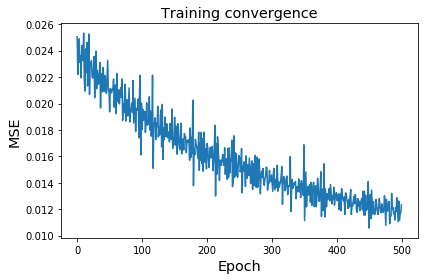

In [22]:
# mse_history = history.history['mse']
# np.save("lorenz_traj_mse_history.npy", mse_history)
mse_history = np.load("lorenz_traj_mse_history.npy")
fig, ax = plt.subplots()
ax.plot(mse_history[-500:])
ax.set_title('Training convergence')
ax.set_ylabel('MSE')
ax.set_xlabel('Epoch')
save_fig(fig, "lorenz_traj_training_convergence")

In [3]:
# Save best model.
#best_model.save('best_model_e1000_b1000_lr0.001_ssss')
best_model = tf.keras.models.load_model('best_model_e1000_b1000_lr0.001_ssss')

# Testing given initial condition

In [4]:
test_rhos = [17,35]
test_sample = 3
train_inputs = []
train_outputs = []
test_preds = []
for rho in test_rhos:
  ts, ys = util.load_lorenz_data(get_data_path(rho, sample = test_sample))
  init_cond = ys[0:1,:].T
  num_time = ys.shape[0]
  test_preds.append(core.create_pred_lorenz(init_cond, rho, best_model, num_time)) 

t = 10
t = 20
t = 30
t = 40
t = 50
t = 60
t = 70
t = 80
t = 90
t = 100
t = 110
t = 120
t = 130
t = 140
t = 150
t = 160
t = 170
t = 180
t = 190
t = 200
t = 210
t = 220
t = 230
t = 240
t = 250
t = 260
t = 270
t = 280
t = 290
t = 300
t = 310
t = 320
t = 330
t = 340
t = 350
t = 360
t = 370
t = 380
t = 390
t = 400
t = 410
t = 420
t = 430
t = 440
t = 450
t = 460
t = 470
t = 480
t = 490
t = 500
t = 510
t = 520
t = 530
t = 540
t = 550
t = 560
t = 570
t = 580
t = 590
t = 600
t = 610
t = 620
t = 630
t = 640
t = 650
t = 660
t = 670
t = 680
t = 690
t = 700
t = 710
t = 720
t = 730
t = 740
t = 750
t = 760
t = 770
t = 780
t = 790
t = 800
NN prediction of full lorenz trajectory takes 36.22945857048035 s
t = 10
t = 20
t = 30
t = 40
t = 50
t = 60
t = 70
t = 80
t = 90
t = 100
t = 110
t = 120
t = 130
t = 140
t = 150
t = 160
t = 170
t = 180
t = 190
t = 200
t = 210
t = 220
t = 230
t = 240
t = 250
t = 260
t = 270
t = 280
t = 290
t = 300
t = 310
t = 320
t = 330
t = 340
t = 350
t = 360
t = 370
t = 380
t = 390


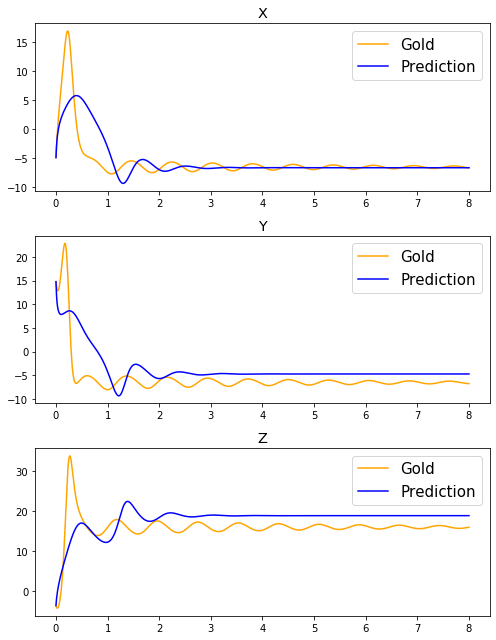

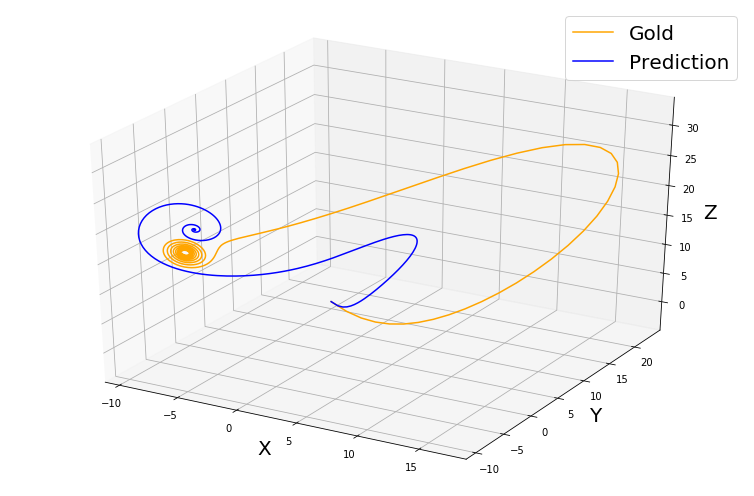

In [7]:
reload(util)
rho_i = 0
rho = test_rhos[rho_i]
pred = test_preds[rho_i].T
ts, gold = util.load_lorenz_data(get_data_path(rho, sample=test_sample))
fig = util.plot_lorenz_2ds_compare(ts, gold, pred)
save_fig(fig, "lorenz_traj_rho17_2d")
fig = util.plot_lorenz_3d_compare(ts, gold, pred)
save_fig(fig, "lorenz_traj_rho17_3d")

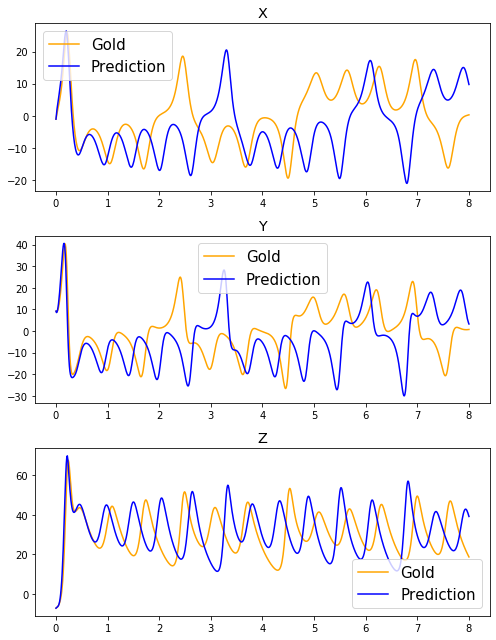

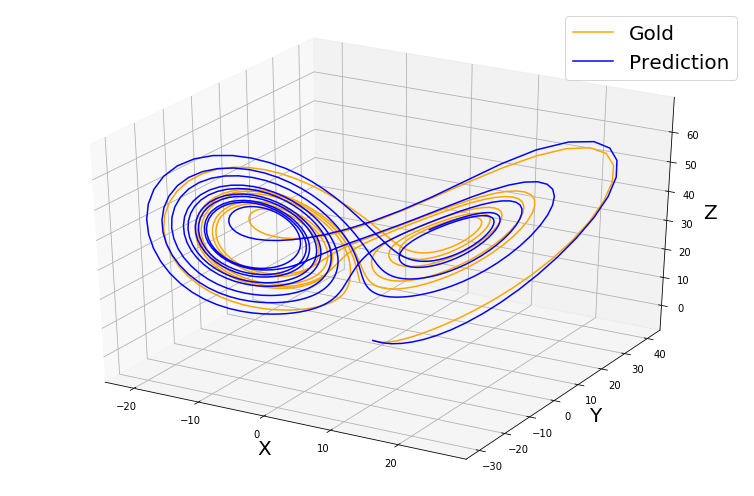

In [8]:
rho_i = 1
rho = test_rhos[rho_i]
pred = test_preds[rho_i].T
ts, gold = util.load_lorenz_data(get_data_path(rho, sample=test_sample))
fig = util.plot_lorenz_2ds_compare(ts, gold, pred)
save_fig(fig, "lorenz_traj_rho35_2d")
fig = util.plot_lorenz_3d_compare(ts, gold, pred)
save_fig(fig, "lorenz_traj_rho35_3d")